In [1]:
import pandas as pd
import random
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.callbacks import EarlyStopping

### Importing and visualizing the data

In [2]:
df = pd.read_csv("Customer_Churn.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Removing RowNumber,CustomerId,Surname

In [3]:
X = df.iloc[:,3:13]
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


### Target Values

In [4]:
y = df.iloc[:,-1]
y.head(3)


0    1
1    0
2    1
Name: Exited, dtype: int64

### Binarizing the Categorical variables: Geography and Gender

In [5]:
encoder = LabelBinarizer()
geo = pd.DataFrame(encoder.fit_transform(X['Geography']))
geo = geo.rename(columns={0: "P1",1: "P2",2: "P3"})
geo.head(3)

,P1,P2,P3
0,1,0,0
1,0,0,1
2,1,0,0


In [6]:
gen = pd.DataFrame(encoder.fit_transform(X['Gender']))
gen = gen.rename(columns={0: "Gen"})
gen.head(3)

,Gen
0,0
1,0
2,0


In [7]:
X = pd.concat([X, gen, geo], axis=1)
X = X.drop(["Gender","Geography"], axis=1)

X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gen,P1,P2,P3
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0


### Splitting the dataset into train and test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state = 101)

In [9]:
X_train = X_train
X_train.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gen,P1,P2,P3
6861,605,41,5,103154.66,1,0,0,143203.78,1,0,0,1
9881,687,40,1,0.00,2,1,0,8207.36,0,0,0,1
4536,642,55,7,0.00,2,1,1,101515.76,0,1,0,0


# Fitting the regressor

In [10]:
Lregressor = LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None).fit(X_train, y_train)


In [11]:
#Regressor object

Lregressor

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## LogisticRegression returns the following attributes:
 ####   a) classes_: ndarray of shape (n_classes, )
 ####   b) coef_: ndarray of shape (1, n_features) or (n_classes, n_features)
 ####   c) intercept_: ndarray of shape (1,) or (n_classes,), (a.k.a. bias) added to the decision function.
 ####   d) n_iter_: ndarray of shape (n_classes,) or (1, )
    
For further details consult the original documentation availabe [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [12]:
Coefficients = pd.DataFrame(Lregressor.coef_)
Intercepts = pd.DataFrame(Lregressor.intercept_)

In [13]:
Coefficients

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.005078,0.043356,-0.001681,0.000004,-0.0004,-0.000098,-0.001373,-0.000001,-0.001011,-0.00079,0.000943,-0.000333


In [14]:
Intercepts

,0
0,-0.00018


## Plotting: <t>  ($b_i$) vs $1/(1+exp(-b_0 - b_i)$ for all i (i.e. for each variable)

In [15]:
for i in range(X_train.shape[1]):
    locals()["x"+str(i)] = np.array(X_train.iloc[:,i])


In [16]:
for i in range(X_train.shape[1]):
    locals()["arr"+str(i)] = 1/(1 + np.exp(- np.array(Intercepts)  - np.array(Coefficients[i])*np.array(X_train.iloc[:,i]) ))


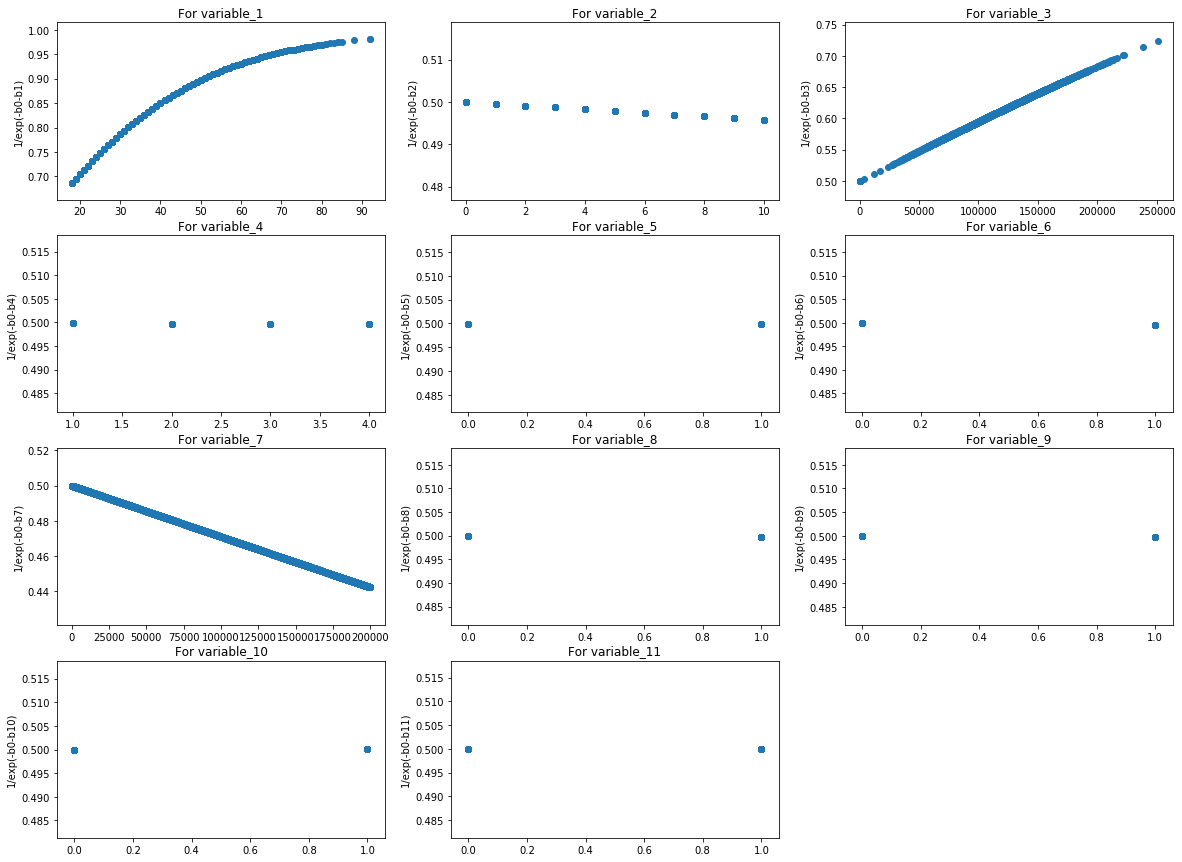

In [17]:
fig = plt.figure(figsize=(20,15))
for i in range(1,X_train.shape[1]):
    plt.subplot(4, 3, i)
    plt.scatter(locals()["x"+str(i)],locals()["arr"+str(i)][0])
    plt.title("For variable_"+str(i))
    plt.ylabel("1/exp(-b0-b"+str(i)+")")  
    

# Predicting Class Labels for test data

In [18]:
y_pred = Lregressor.predict(X_test)

In [19]:
result = pd.DataFrame({"Predicted":y_pred,"Actual":y_test}).reset_index()
result.head(3)

,index,Predicted,Actual
0,6676,0,0
1,6421,0,0
2,9834,0,1


# Performance Metrics

In [20]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1945
           1       0.05      0.36      0.08        55

    accuracy                           0.78      2000
   macro avg       0.51      0.58      0.48      2000
weighted avg       0.95      0.78      0.85      2000



### Accuracy = 78%

# Features selection by weight of evidence(woe) and Information Value(IV)

In [21]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [22]:
data = pd.concat([X,y], axis=1)
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gen,P1,P2,P3,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0,1


In [23]:
iv, woe = iv_woe(data = data, target = 'Exited', bins=10, show_woe = False)

## Information values of different varables:

In [24]:
pd.DataFrame(iv).reset_index().drop(["index"], axis=1)

,Variable,IV
0,CreditScore,0.009527
1,Age,0.783136
2,Tenure,0.008689
3,Balance,0.097644
4,NumOfProducts,0.984829
5,HasCrCard,0.000313
6,IsActiveMember,0.153233
7,EstimatedSalary,0.002303
8,Gen,0.069775
9,P1,0.068690


## Thus we can see No. of Products has the highest Information Value, so fitting the regressor with features having IV value > 0.1 and then predicting the target we get:

In [25]:
X_trunc_train = X_train.iloc[:,[1,4,6,10]]
X_trunc_test = X_test.iloc[:,[1,4,6,10]]

X_trunc_train.head(3)

,Age,NumOfProducts,IsActiveMember,P2
6861,41,1,0,0
9881,40,2,0,0
4536,55,2,1,0


In [26]:
New_L_reg = LogisticRegression()

In [27]:
New_L_reg.fit(X_trunc_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred_trunc = New_L_reg.predict(X_trunc_test)

In [29]:
print(classification_report(y_pred_trunc, y_test, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1876
           1       0.19      0.66      0.30       124

    accuracy                           0.81      2000
   macro avg       0.58      0.74      0.59      2000
weighted avg       0.93      0.81      0.85      2000



## Accuracy = 81%

## Previously accuracy was 78%, now its 81%. Though the increase is small, but we can see the significance of Information Value. 